In [1]:
!pip install wikipedia
!pip install wikipedia-api

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=ddaf3be806cc2f3193916a5b7b669fb7e1da3635b6fed09e476098adcdfbb66d
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.5.4-cp36-none-any.whl size=13462 sha256=ce16c0b3a854567de9c78e5204709c95b8a79e8f93ed27e29cb40ba8be554cd7
  Stored in directory: /root/.cache/pip/wheels/bf/40/42/ba1d497f3712281b659dd65b566fc868035c859239571a725a
Successfully built wikipedia-api


In [2]:
import doc_utils
import max_sim_classifier
from arxiv_parser import arxiv_parser

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
from max_sim_classifier import MaxSimClassifier

#Testing MaxSimClassifier with Arxiv dataset

In [4]:
arxiv_wiki_topics = ["Computer science",
               "Economics",
               "Systems engineering",
               "Mathematics",
               "Astrophysics",
               "Quantitative biology",
               "Quantitative finance",
               "Statistics"]
#note: Astrophysics should be physics, but throws error
topic_defs = doc_utils.concurrentGetWikiFullPage(topics_list =arxiv_wiki_topics )

Obtaining full wikipedia page for the topic: Computer science. (Definition of Class #[0])
Obtaining full wikipedia page for the topic: Economics. (Definition of Class #[1])Obtaining full wikipedia page for the topic: Systems engineering. (Definition of Class #[2])

Obtaining full wikipedia page for the topic: Mathematics. (Definition of Class #[3])
Obtaining full wikipedia page for the topic: Astrophysics. (Definition of Class #[4])Obtaining full wikipedia page for the topic: Quantitative biology. (Definition of Class #[5])

Obtaining full wikipedia page for the topic: Quantitative finance. (Definition of Class #[6])Obtaining full wikipedia page for the topic: Statistics. (Definition of Class #[7])



## Off-the-shelf model testing

In [5]:
dataset = arxiv_parser(100)

Retrieved 800 papers in total from 8 subjects (100 from each).


In [0]:
x_train, y_train, x_test, y_test = doc_utils.processClassifierData(topic_defs, 
                                                                   dataset, 
                                                                   arxiv_wiki_topics, 
                                                                   dataset_type="arxiv")

In [0]:
max_sim_model = MaxSimClassifier(dataset_type="arxiv")

In [10]:
max_sim_model.fit(x_train, y_train)

MaxSimClassifier(dataset_type='arxiv', epochs=50, min_count=2, vector_size=50)

In [11]:
#note that x_test is not used TODO: change processClassifierData
max_sim_model.score(dataset, y_test)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.381875

Accuracy: **38.2%**

In [12]:
predictions = max_sim_model.predict(dataset)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


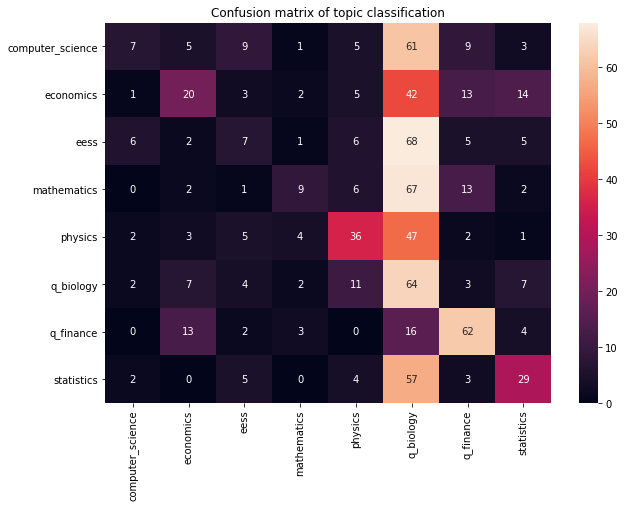

In [13]:
doc_utils.plotConfMatrix(y_test, predictions, model="maxsim", dataset_type="arxiv")

Los fallos localizados en quantitative biology tienen sentido ya que es con diferencia el tópico peor definido.

In [14]:
x_train[5]

'Quantitative biology is an umbrella term encompassing the use of mathematical, statistical or computational techniques to study life and living organisms. The central theme and goal of quantitative biology is the creation of predictive models based on fundamental principles governing living systems.The subfields of biology that employ quantitative approaches include:\n\nMathematical and theoretical biology\nComputational biology\nBioinformatics\nBiostatistics\nSystems biology\nPopulation biology\nSynthetic biology\nEpidemiology\n\n\n== References =='

Mean topic definition length: 23881.125


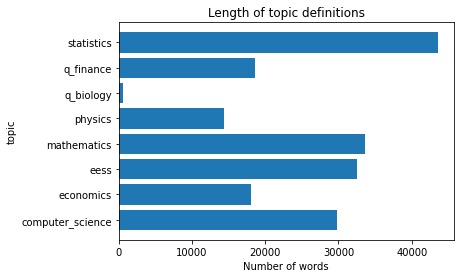

In [15]:
import matplotlib.pyplot as plt

total_len = 0
topic_lengths = list()
for topic in x_train:
    total_len += len(topic)
    topic_lengths.append(len(topic))

print("Mean topic definition length:", total_len/len(x_train))

plt.barh(doc_utils.ARXIV_SUBJECTS, topic_lengths, align='center')
plt.title("Length of topic definitions")
plt.xlabel("Number of words")
plt.ylabel("topic")
plt.show()

## Improving accuracy by changing topic definition

In [0]:
#Let's just change the name of the topic for the wikipedia topic retrieval

In [28]:
arxiv_wiki_topics = ["Computer science",
               "Economics",
               "Systems engineering",
               "Mathematics",
               "Astrophysics",
               "Computational biology",
               "Quantitative finance",
               "Statistics"]
#note: Astrophysics should be physics, but throws error
topic_defs = doc_utils.concurrentGetWikiFullPage(topics_list =arxiv_wiki_topics )

Obtaining full wikipedia page for the topic: Computer science. (Definition of Class #[0])
Obtaining full wikipedia page for the topic: Economics. (Definition of Class #[1])
Obtaining full wikipedia page for the topic: Systems engineering. (Definition of Class #[2])
Obtaining full wikipedia page for the topic: Mathematics. (Definition of Class #[3])
Obtaining full wikipedia page for the topic: Astrophysics. (Definition of Class #[4])
Obtaining full wikipedia page for the topic: Computational biology. (Definition of Class #[5])
Obtaining full wikipedia page for the topic: Quantitative finance. (Definition of Class #[6])
Obtaining full wikipedia page for the topic: Statistics. (Definition of Class #[7])


In [31]:
x_train, y_train, x_test, y_test = doc_utils.processClassifierData(topic_defs, dataset, 
                                                                    arxiv_wiki_topics, 
                                                                   dataset_type="arxiv")
max_sim_model = MaxSimClassifier(dataset_type="arxiv")

max_sim_model.fit(x_train, y_train)

MaxSimClassifier(dataset_type='arxiv', epochs=50, min_count=2, vector_size=50)

### Weighted top2 accuracy

Improved weighted accuracy to **43.7%**

*Note*: **weighted** acc = (first guess reward (1) vs rest (0) )

In [32]:
max_sim_model.score(dataset, y_test) #eval = weighted

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.436875

### Top2 accuracy

Achieves **51.15%** (first or second guesses have same reward (1) vs rest (0) )

In [30]:
max_sim_model.score(dataset, y_test, eval="top2")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.515

### Model and data explainability and error evaluation

Mean topic definition length: 25648.25


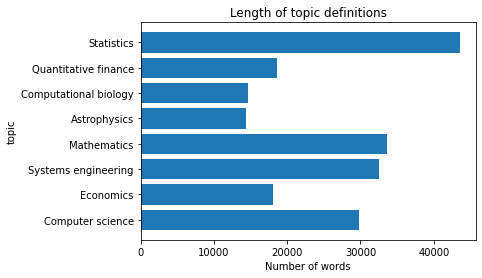

In [18]:
import matplotlib.pyplot as plt

total_len = 0
topic_lengths = list()
for topic in x_train:
    total_len += len(topic)
    topic_lengths.append(len(topic))

print("Mean topic definition length:", total_len/len(x_train))

plt.barh(arxiv_wiki_topics, topic_lengths, align='center')
plt.title("Length of topic definitions")
plt.xlabel("Number of words")
plt.ylabel("topic")
plt.show()

In [19]:
predictions = max_sim_model.predict(dataset)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


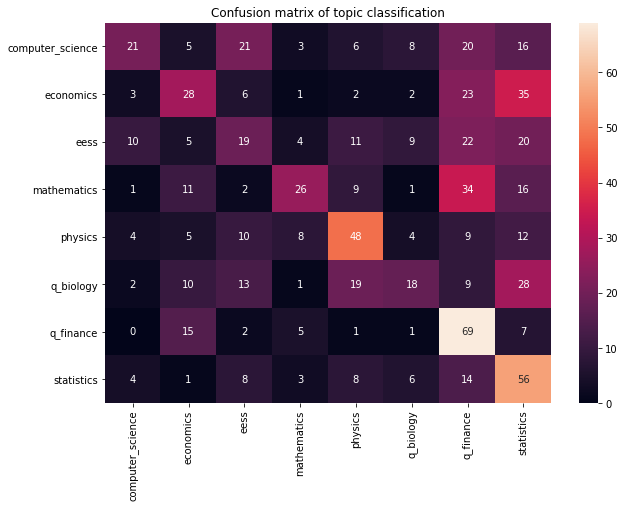

In [20]:
doc_utils.plotConfMatrix(y_test, predictions, model="maxsim", dataset_type="arxiv")

this amount of classification mistakes classifying as statistics may have 2 main reasons:


*   Obviously every paper contains certain degree of statistical commentary, thus makes sense. However, we are also giving a .5 weight on 2nd classifications. --> Possible solution, to simply do a TOP2 classification error, i.e 1 if 1st or 2nd category, 0 if none.
*   Topic definition of Statistics is huge (x2 the avg. words)



# Testing MaxSimClassifier with Wikipedia dataset

In [33]:
wiki_topic_defs_full = doc_utils.concurrentGetWikiFullPage(topics_list = doc_utils.ALL_TOPICS)
wiki_test_data, n_test_samples = doc_utils.concurrentGetAllCatArticles(doc_utils.ALL_TOPICS, full_text_test=True)

Obtaining full wikipedia page for the topic: Chemical engineering. (Definition of Class #[0])
Obtaining full wikipedia page for the topic: Biomedical engineering. (Definition of Class #[1])
Obtaining full wikipedia page for the topic: Civil engineering. (Definition of Class #[2])
Obtaining full wikipedia page for the topic: Electrical engineering. (Definition of Class #[3])
Obtaining full wikipedia page for the topic: Mechanical engineering. (Definition of Class #[4])
Obtaining full wikipedia page for the topic: Aerospace engineering. (Definition of Class #[5])
Obtaining full wikipedia page for the topic: Software engineering. (Definition of Class #[6])
Obtaining full wikipedia page for the topic: Industrial engineering. (Definition of Class #[7])
Obtaining full wikipedia page for the topic: Computer engineering. (Definition of Class #[8])
Retrieved 38 articles from category topic 'Computer engineering'[TopicID:8]
Retrieved 57 articles from category topic 'Software engineering'[TopicID

In [34]:
x_train, y_train, x_test, y_test = doc_utils.processClassifierData(wiki_topic_defs_full, wiki_test_data, 
                                                                    doc_utils.ALL_TOPICS, 
                                                                    dataset_type="wiki")
                                                        
max_sim_model = MaxSimClassifier(dataset_type="wiki")

max_sim_model.fit(x_train, y_train)

MaxSimClassifier(dataset_type='wiki', epochs=50, min_count=2, vector_size=50)

## Weighted top2 accuracy

**66%**

In [35]:
max_sim_model.score(wiki_test_data, y_test) #todo: solve x_test issue

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.6602822580645161

## Top2 accuracy

**74.1%**

In [36]:
max_sim_model.score(wiki_test_data, y_test, eval="top2")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.7419354838709677

## Model and data explainability and error evaluation

Mean topic definition length: 22756.222222222223


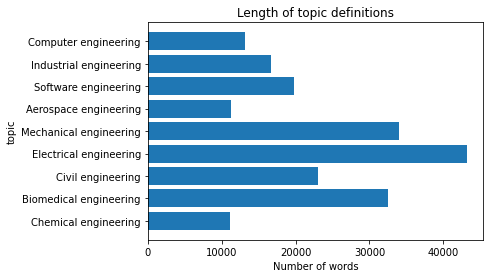

In [37]:
total_len = 0
topic_lengths = list()
for topic in x_train:
    total_len += len(topic)
    topic_lengths.append(len(topic))

print("Mean topic definition length:", total_len/len(x_train))

plt.barh(doc_utils.ALL_TOPICS, topic_lengths, align='center')
plt.title("Length of topic definitions")
plt.xlabel("Number of words")
plt.ylabel("topic")
plt.show()

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


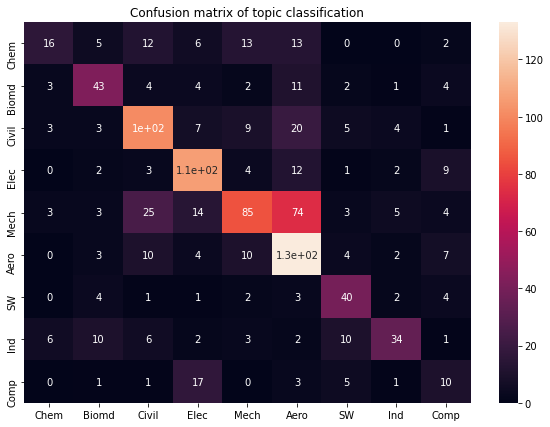

In [27]:
predictions = max_sim_model.predict(wiki_test_data)
doc_utils.plotConfMatrix(y_test, predictions, model="maxsim", dataset_type="wiki")